# Santander Customer Transaction Prediction - Decision Tree

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn import tree
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### **Data training handling**
##### 20% of data will be kept to validate the model.

In [3]:
training_set = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/santander_train.csv")
training_set.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [4]:
X = training_set.drop(["ID_code", "target"], axis=1)
y = training_set["target"]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=33)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

#### **Model fitting**

In [6]:
model = tree.DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

[Text(0.25, 0.9375, 'X[81] <= 12.238\ngini = 0.5\nsamples = 160000\nvalue = [80000.0, 80000.0]'),
 Text(0.125, 0.8125, 'gini = 0.456\nsamples = 22785\nvalue = [10503.916, 19330.726]'),
 Text(0.375, 0.8125, 'X[139] <= 2.5\ngini = 0.498\nsamples = 137215\nvalue = [69496.084, 60669.274]'),
 Text(0.25, 0.6875, 'gini = 0.492\nsamples = 34898\nvalue = [16945.925, 21943.254]'),
 Text(0.5, 0.6875, 'X[12] <= 13.764\ngini = 0.489\nsamples = 102317\nvalue = [52550.159, 38726.02]'),
 Text(0.375, 0.5625, 'gini = 0.484\nsamples = 8723\nvalue = [4180.884, 5975.042]'),
 Text(0.625, 0.5625, 'X[26] <= 5.565\ngini = 0.481\nsamples = 93594\nvalue = [48369.274, 32750.978]'),
 Text(0.5, 0.4375, 'X[109] <= 11.746\ngini = 0.474\nsamples = 88133\nvalue = [45764.005, 28901.72]'),
 Text(0.375, 0.3125, 'gini = 0.485\nsamples = 4415\nvalue = [2118.241, 3004.905]'),
 Text(0.625, 0.3125, 'X[146] <= 7.8\ngini = 0.467\nsamples = 83718\nvalue = [43645.765, 25896.815]'),
 Text(0.5, 0.1875, 'gini = 0.5\nsamples = 12945\n

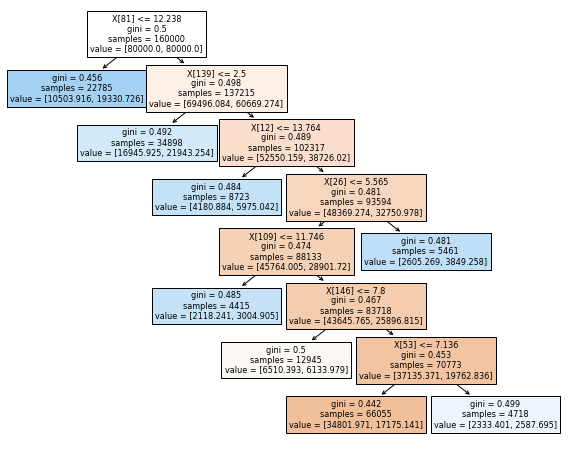

In [7]:
fig = plt.figure(figsize=(10,8))

tree.plot_tree(model, filled=True)

#### **Model prediction**

In [8]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

In [9]:
auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

print("AUC train = {}\nAUC valid = {}".format(auc_train, auc_valid))

AUC train = 0.6125202736875817
AUC valid = 0.6041158806041689


#### **Looking for the optimal hyperparameter using Cross Validation**
##### 15 iterations

In [10]:
def cv_roc_auc_scorer(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

for max_leafs in range(2, 17):
  model = tree.DecisionTreeClassifier(max_leaf_nodes=max_leafs, class_weight="balanced")
  kfold_scores = cross_validate(model, X, y, scoring=cv_roc_auc_scorer, return_train_score=True)
  
  # Find average train and test score
  train_auc_avg = np.mean(kfold_scores["train_score"])
  test_auc_avg = np.mean(kfold_scores["test_score"])

  print("Nodes: {}, Train: {:.4f}, Valid: {:.4f}, Diff: {:.4f}".format(max_leafs, train_auc_avg,
                                                                       test_auc_avg, train_auc_avg-test_auc_avg))

Nodes: 2, Train: 0.5548, Valid: 0.5534, Diff: 0.0014
Nodes: 3, Train: 0.5849, Valid: 0.5805, Diff: 0.0044
Nodes: 4, Train: 0.5963, Valid: 0.5927, Diff: 0.0036
Nodes: 5, Train: 0.6032, Valid: 0.5992, Diff: 0.0041
Nodes: 6, Train: 0.6065, Valid: 0.6016, Diff: 0.0049
Nodes: 7, Train: 0.6079, Valid: 0.6026, Diff: 0.0053
Nodes: 8, Train: 0.6084, Valid: 0.6031, Diff: 0.0052
Nodes: 9, Train: 0.6084, Valid: 0.6031, Diff: 0.0052
Nodes: 10, Train: 0.6093, Valid: 0.6025, Diff: 0.0068
Nodes: 11, Train: 0.6094, Valid: 0.6024, Diff: 0.0069
Nodes: 12, Train: 0.6123, Valid: 0.6047, Diff: 0.0076
Nodes: 13, Train: 0.6136, Valid: 0.6062, Diff: 0.0074
Nodes: 14, Train: 0.6144, Valid: 0.6061, Diff: 0.0083
Nodes: 15, Train: 0.6168, Valid: 0.6083, Diff: 0.0085
Nodes: 16, Train: 0.6180, Valid: 0.6090, Diff: 0.0090


#### **Final model with best hyperparameter found**
##### The best performance on validation set (with minimum number of trees) is for 8 nodes.

In [11]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=8, class_weight="balanced")
model.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

[Text(0.2857142857142857, 0.9375, 'X[81] <= 12.209\ngini = 0.5\nsamples = 200000\nvalue = [100000.0, 100000.0]'),
 Text(0.14285714285714285, 0.8125, 'gini = 0.456\nsamples = 28047\nvalue = [12924.259, 23863.071]'),
 Text(0.42857142857142855, 0.8125, 'X[139] <= 3.133\ngini = 0.498\nsamples = 171953\nvalue = [87075.741, 76136.929]'),
 Text(0.2857142857142857, 0.6875, 'gini = 0.493\nsamples = 48281\nvalue = [23530.033, 29604.936]'),
 Text(0.5714285714285714, 0.6875, 'X[12] <= 13.764\ngini = 0.488\nsamples = 123672\nvalue = [63545.708, 46531.993]'),
 Text(0.42857142857142855, 0.5625, 'gini = 0.486\nsamples = 10520\nvalue = [5052.751, 7115.136]'),
 Text(0.7142857142857143, 0.5625, 'X[26] <= 5.565\ngini = 0.481\nsamples = 113152\nvalue = [58492.957, 39416.857]'),
 Text(0.5714285714285714, 0.4375, 'X[22] <= 8.82\ngini = 0.474\nsamples = 106591\nvalue = [55354.026, 34869.141]'),
 Text(0.42857142857142855, 0.3125, 'X[109] <= 11.341\ngini = 0.467\nsamples = 100398\nvalue = [52351.28, 30933.426]'

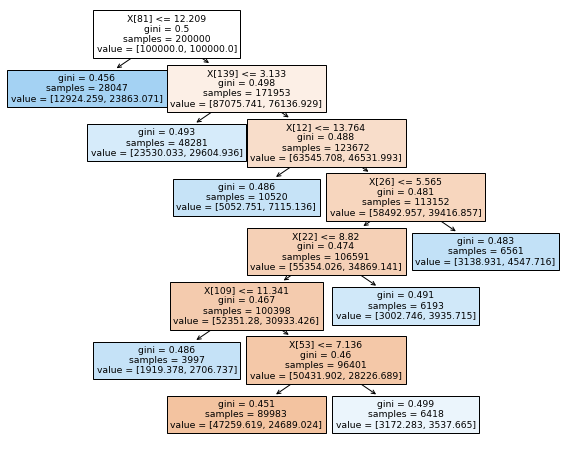

In [12]:
fig = plt.figure(figsize=(10,8))

tree.plot_tree(model, filled=True)

#### **Evaluating model**
##### Getting AUC and ROC plot

In [13]:
y_pred = model.predict(X)

fpr, tpr, _ = metrics.roc_curve(y, y_pred)
metrics.auc(fpr, tpr)

0.6128529767125377

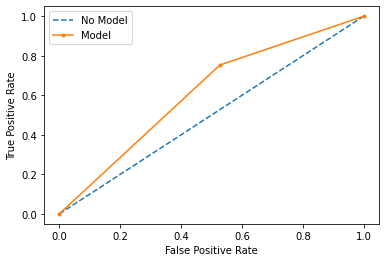

In [14]:
zeros_probs = [0] * len(y)
fpr_zeros, tpr_zeros, _ = metrics.roc_curve(y, zeros_probs)

plt.plot(fpr_zeros, tpr_zeros, linestyle="--", label="No Model")
plt.plot(fpr, tpr, marker=".", label="Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.show()